In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'Datasets/gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3545, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5178.0,2.0,3.0,2,7.0,Relatively New,1502.00,1,0,0,0,0,1,49
1,house,independent,sector 69,0.80,10485.0,1.0,1.0,0,1.0,New Property,763.05,0,0,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13351.0,2.0,3.0,3,4.0,Relatively New,978.23,1,0,0,0,0,0,135
3,flat,pioneer park,sector 61,1.60,11594.0,2.0,2.0,2,21.0,Relatively New,1533.00,0,1,0,0,0,0,105
4,flat,pivotal devaan,sector 84,0.41,7033.0,2.0,2.0,2,10.0,New Property,565.00,0,0,0,0,0,1,23


In [5]:
latlong = pd.read_csv(r'Datasets/latlong.csv')

In [6]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
group_df = (
    new_df
    .groupby('sector', dropna=False)
    .mean(numeric_only=True)[
        ['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']
    ]
)

In [13]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.163889,28.4484,77.0210
manesar,0.927667,4263.033333,2050.365333,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.831667,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.113551,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428095,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.930800,5928.610000,1576.420100,28.4079,76.9153
sector 93,0.848889,8009.888889,1016.996667,28.4153,76.9326
sector 95,0.480545,5602.509091,995.984000,28.4172,76.9081


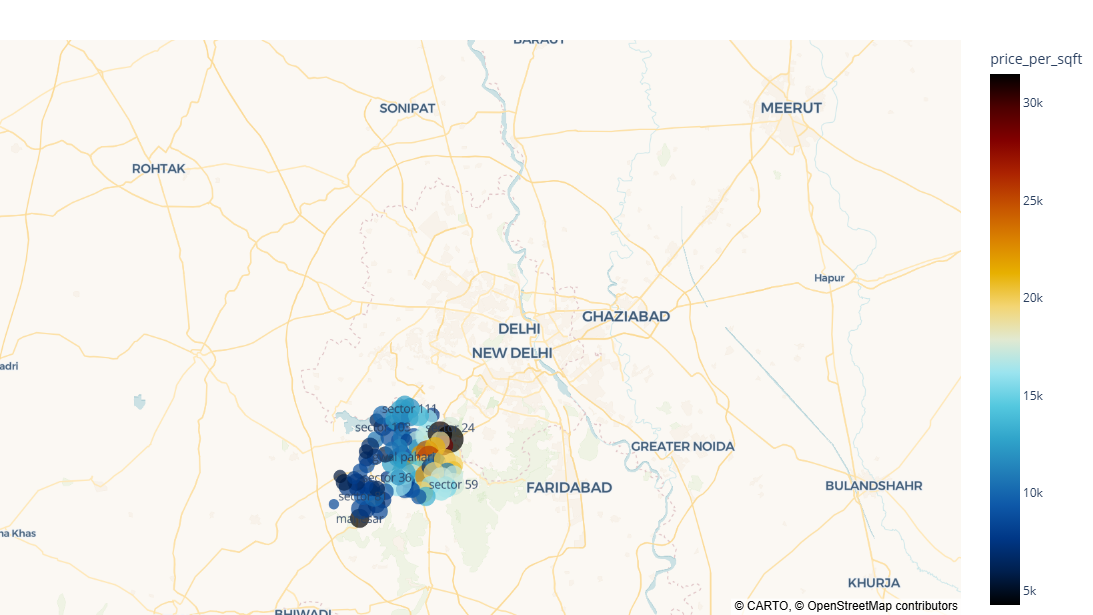

In [14]:
import plotly.express as px

fig = px.scatter_map(
    group_df,
    lat="latitude",
    lon="longitude",
    color="price_per_sqft",
    size="built_up_area",
    text=group_df.index,
    hover_data=["price", "price_per_sqft", "built_up_area", "latitude", "longitude"],
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=10
)

fig.update_layout(
    mapbox_style="open-street-map",
    width=1200,
    height=600,
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

In [15]:
new_df.to_csv('data_viz1.csv',index=False)

In [16]:
df1 = pd.read_csv(r'Datasets/gurgaon_properties.csv')

In [17]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 90 Gurgaon,flat,shree vardhman flora,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2,3,2,study room,"Sector 90 Gurgaon, Gurgaon, Haryana",7.0,North,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'S...",This 2 bhk flat is located in shree vardhman f...,"['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction5 out of..."
1,1 Bedroom House for sale in Sector 69 Gurgaon,house,independent,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1,1,0,not available,"Sector 69, Gurgaon, Sector 69 Gurgaon, Gurgaon...",1.0,NaN,undefined,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",Fully furnished studio apartment with all amen...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,2 BHK Flat in Sector 108 Gurgaon,flat,experion the heartsong,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2,3,3,study room,"Sector 108 Gurgaon, Gurgaon, Haryana",4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Ce...",Corner and airy flat with ample of sunlight th...,"['1 Bed', '1 Sofa', '8 Light', '3 AC', '1 Curt...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction4 out of..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,pioneer park,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2,2,2,servant room,"Sector 61 Gurgaon, Gurgaon, Haryana",21.0,NaN,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar...",Check out this 2 bhk flat for sale in pioneer ...,"['2 Wardrobe', 'No AC', 'No Bed', 'No Chimney'...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction3 out of..."
4,2 BHK Flat in Sector 84 Gurgaon,flat,pivotal devaan,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,not available,"Sector 84 Gurgaon, Gurgaon, Haryana",10.0,East,0 to 1 Year Old,"['Dwarka Expressway', 'RPS International Schoo...",It's a east facing flat. Huge sunlight one can...,"['3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Ligh...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...","['Environment4 out of 5', 'Safety4 out of 5', ..."


In [18]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [19]:
wordcloud_df.head()

,features,sector
0,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 90
1,NaN,sector 69
2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 108
3,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 61
4,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",sector 84


In [20]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [21]:
main

['Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Bank Attached Property',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Spacious Interiors',
 'Low Density Society',
 'Fitness Centre / GYM',
 'Waste Dis

In [22]:
from wordcloud import WordCloud

In [23]:
feature_text = ' '.join(main)

In [24]:
feature_text

'Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Separate entry for servant room No open drainage around Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Spacious Interiors Low Density Society Shopping Centre Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Bank Attached Property Visitor Parking Swimming Pool Park Security Personnel Natural Light Spacious Interiors Low Density Society Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Water softening plant Security / Fire Alarm Lift(s) Maintenance Staff Park Feng Shui / Vaastu Compliant Intercom Facility L

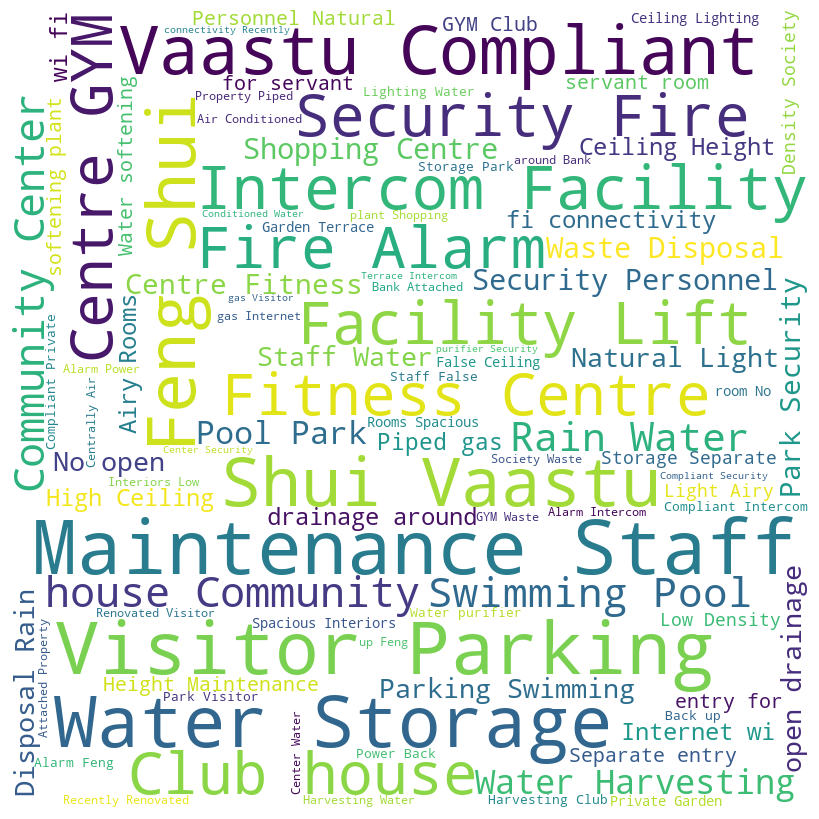

In [25]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [137]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

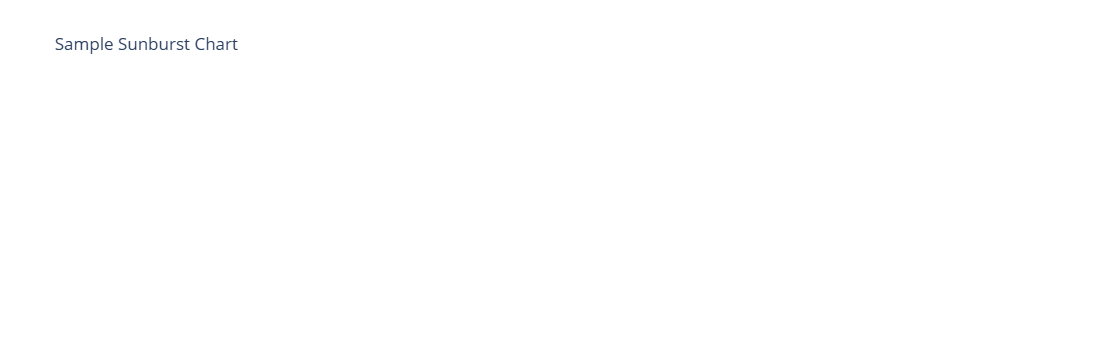

In [26]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

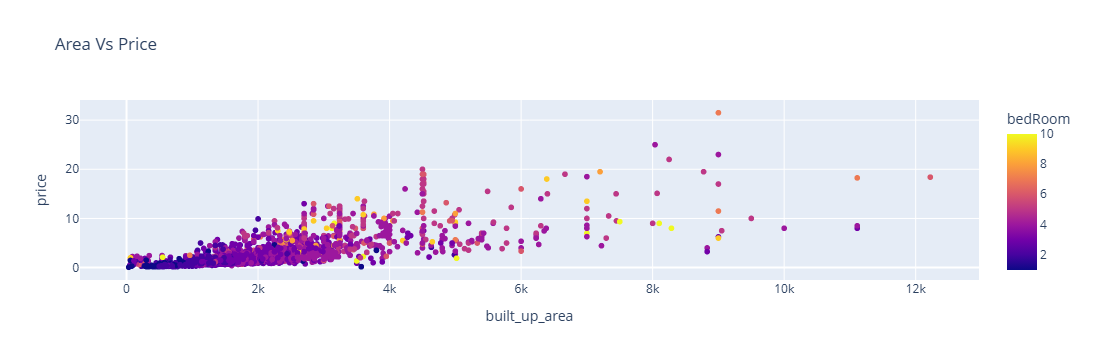

In [27]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

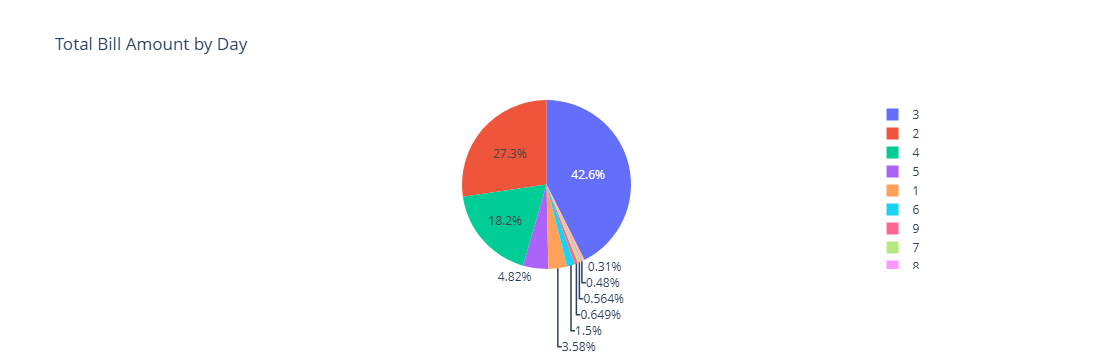

In [28]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

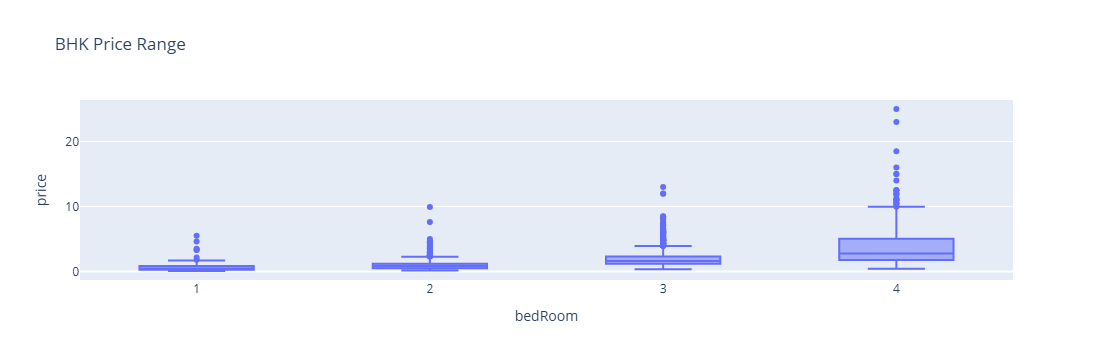

In [29]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


In [145]:
new_df['sector'].unique().tolist().insert(0,'overall')

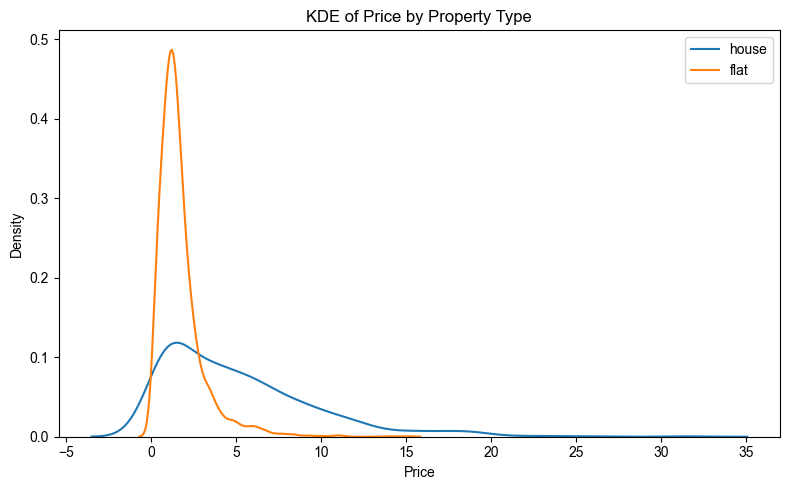

In [31]:
plt.figure(figsize=(8, 5))
for prop in ["house", "flat"]:
    subset = df[df["property_type"] == prop]["price"].dropna()
    sns.kdeplot(subset, label=prop, fill=False)
plt.title("KDE of Price by Property Type")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


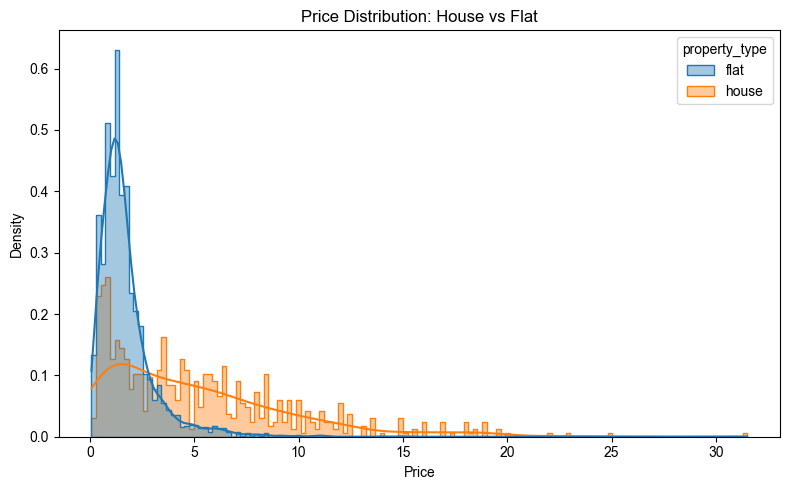

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x="price",
    hue="property_type",
    element="step",           # outlines instead of filled, good for comparison
    stat="density",          # density so different counts are comparable
    common_norm=False,       # each hue normalized independently
    kde=True,                # adds smoothed density
    alpha=0.4
)
plt.title("Price Distribution: House vs Flat")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


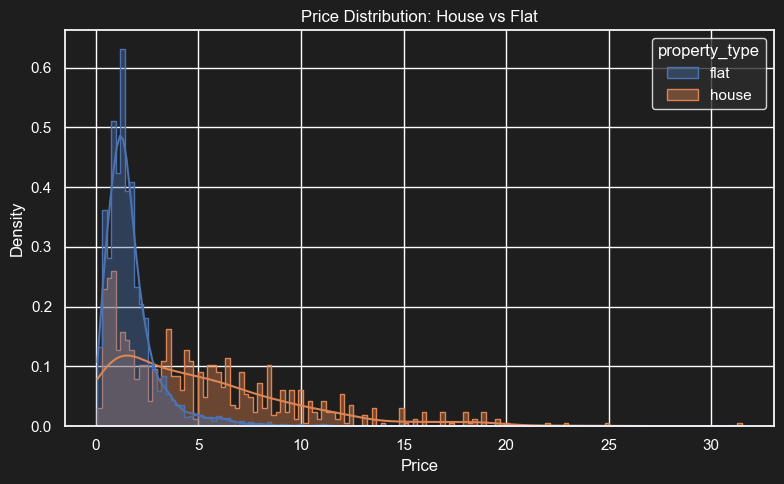

In [41]:
sns.set_theme(style="darkgrid")
plt.rcParams['axes.facecolor'] = '#1e1e1e'
plt.rcParams['figure.facecolor'] = '#1e1e1e'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['legend.facecolor'] = '#2c2c2c'
plt.rcParams['legend.edgecolor'] = 'white'

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x="price",
    hue="property_type",
    element="step",
    stat="density",
    common_norm=False,
    kde=True,
    alpha=0.4
)
plt.title("Price Distribution: House vs Flat")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


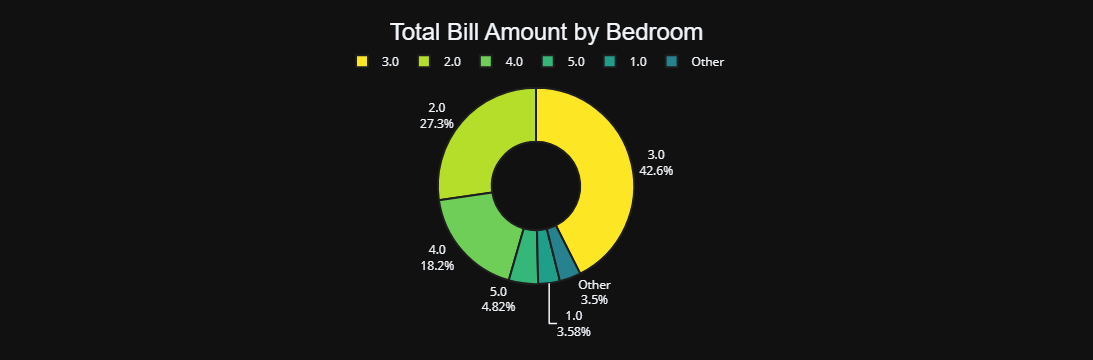

In [40]:
import plotly.express as px
import pandas as pd

threshold = 0.03 
counts = df['bedRoom'].value_counts(normalize=True)
small = counts[counts < threshold].index.tolist()
df_mod = df.copy()
df_mod['bedRoom_collapsed'] = df_mod['bedRoom'].astype(str)
if small:
    df_mod.loc[df_mod['bedRoom'].isin(small), 'bedRoom_collapsed'] = "Other"


collapsed_props = {}
for label in df_mod['bedRoom_collapsed'].unique():
    if label == "Other":
        collapsed_props[label] = counts[counts < threshold].sum()
    else:
        try:
            key = float(label)
        except ValueError:
            key = label
        collapsed_props[label] = counts.get(key, 0)
largest_label = max(
    (lbl for lbl in collapsed_props if lbl != "Other"),
    key=lambda l: collapsed_props.get(l, 0),
    default=None
)


fig = px.pie(
    df_mod,
    names='bedRoom_collapsed',
    title='Total Bill Amount by Bedroom',
    hole=0.45,
    color_discrete_sequence=px.colors.sequential.Viridis_r,
    labels={'bedRoom_collapsed': 'Bedrooms'}
)

fig.update_layout(
    template="plotly_dark",
    title=dict(font=dict(size=24, family="Arial"), x=0.5),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        bgcolor="rgba(0,0,0,0)",
        font=dict(size=12),
        title=None
    ),
    margin=dict(t=80, b=30, l=30, r=30)
)


pull_vals = [0.08 if lbl == largest_label else 0 for lbl in df_mod['bedRoom_collapsed'].unique()]
fig.update_traces(
    textposition="outside",
    textinfo="percent+label",
    pull=pull_vals,
    hovertemplate="<b>%{label}</b><br>Percent: %{percent:.1%}<extra></extra>",
    marker=dict(line=dict(color="#1e1e1e", width=2))
)


if "Other" in df_mod['bedRoom_collapsed'].unique():
    fig.for_each_trace(lambda t: t.update(legendrank=1) if t.name == "Other" else None)

fig.show()
